What are the files for each event?

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

#read list of events from txt file
eve = np.loadtxt('./../data/events/sample_events1212_withNGI.txt',dtype = 'str')
sim_dir = './../data/simu/PS_manning003/'
eve_row = 409
#read the file in one of the sim event folder
eve_path = os.path.join(sim_dir,eve[eve_row])
file_list = glob.glob(eve_path + '/*.nc')
print(*file_list,sep = "\n")
print('')
file_list.sort()


./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/CT_defbathy.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/CT_deformation.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/CT_flowdepth.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/CT_hmax.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/C_CT.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/C_SR.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/SR_deformation.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/SR_flowdepth.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/SR_hmax.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M

sorting and listing the variables stored in the netcdf files

In [2]:
print(*file_list,sep = "\n")
print('')
print(eve[eve_row])

for i in range(len(file_list)):
    print(file_list[i])
    ds = xr.open_dataset(file_list[i])
    print(ds)

#read the file in one of the sim event folder

./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/CT_defbathy.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/CT_deformation.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/CT_flowdepth.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/CT_hmax.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/C_CT.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/C_SR.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/SR_defbathy.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/SR_deformation.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005/SR_flowdepth.nc
./../data/simu/PS_manning003/E01548N3896E01854N3659-PS-Str_PYes_H

Map to see the offshore points and onshore grids

E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005



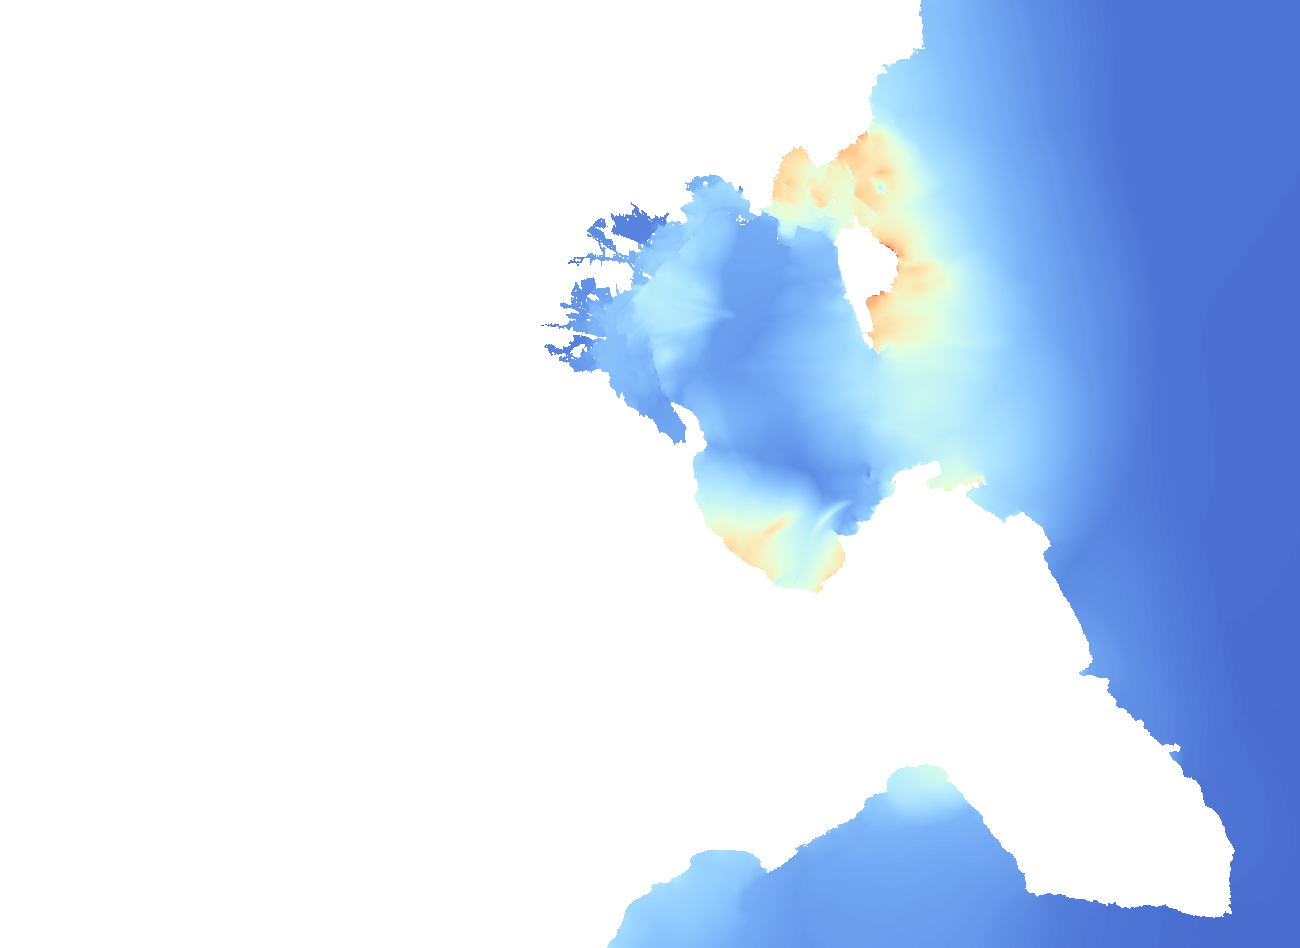
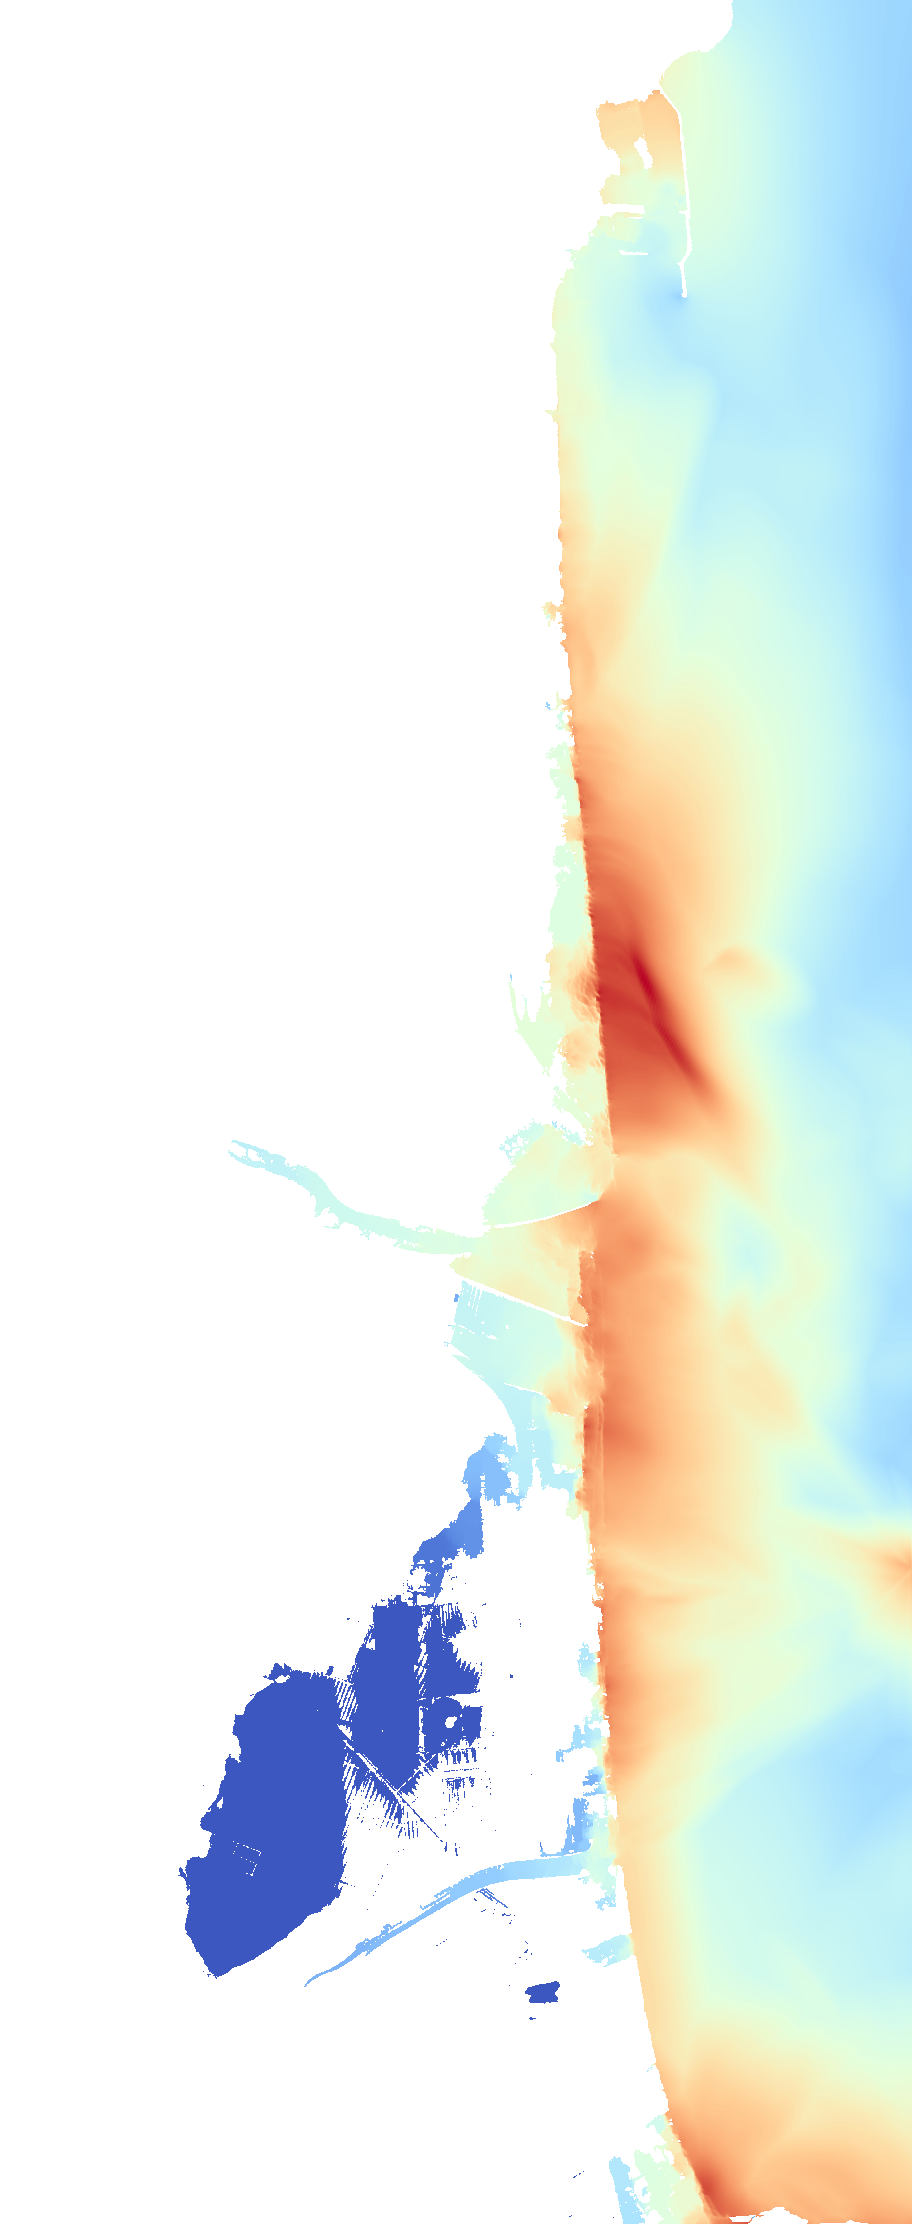

In [17]:
import folium
import folium.plugins

# Load the points file
data_pts = np.loadtxt('../resources/Raw/pois_eastern_sicily_2km.txt', dtype=str)
id_pts = data_pts[:, 0]
lon_pts = data_pts[:, 1].astype(float)
lat_pts = data_pts[:, 2].astype(float)
z_pts = data_pts[:, 3].astype(float)

ds_ts = xr.open_dataset(file_list[-2]) #gridts file
ds_grids_CT = xr.open_dataset(file_list[4]) #gridts file
ds_grids_SR = xr.open_dataset(file_list[5]) #gridts file

# Create a Folium map centered on the data's extent
m = folium.Map(location=[np.mean(lat_pts),np.mean(lon_pts)], zoom_start=10)

# Basemaps
folium.TileLayer(tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True,
        show = True).add_to(m)

# Create a feature group for the offshore points 
fg_pts = folium.FeatureGroup(name='Offshore Points Txt').add_to(m)
fg_ptsNC = folium.FeatureGroup(name='Offshore Points NetCDF').add_to(m)
fg_gridnc_SR = folium.FeatureGroup(name='SR Grid NetCDF').add_to(m)
fg_gridnc_CT = folium.FeatureGroup(name='CT Grid NetCDF').add_to(m)

#add eq lat lon point
print(eve[eve_row])

# E01548N3896E01854N3659-PS-Str_PYes_Hom-M861_E01673N3781_S005
lon = float(str(eve[eve_row]).split('_')[-2][1:5])/10
lat = float(str(eve[eve_row]).split('_')[-2][7:11])/100

folium.CircleMarker(location=[lat,lon],radius = 15,color='red',fill_color = 'red').add_to(m)

# Add a marker for each point with a tooltip showing its id
for id, lat, lon,z in zip(id_pts, lat_pts, lon_pts, z_pts):
    info = f"ID:{id}, Depth: {z} "  # Create tooltip string
    folium.Marker(location=[lat, lon],
                  tooltip=info,
                  icon=folium.Icon(color='blue', icon='')).add_to(fg_pts)

df_ts = pd.DataFrame({'lat':ds_ts.latitude.values.astype(float),
                      'lon':ds_ts.longitude.values.astype(float),
                      'z':ds_ts.deformed_bathy.values.astype(float)})

for i,row in df_ts.iterrows():
    info = f"ID:{i}, Depth: {row['z']} "  # Create tooltip string
    folium.Marker(location=[row['lat'], row['lon']],
                  tooltip=info,
                 icon=folium.Icon(color='red', icon='')).add_to(fg_ptsNC)

# Add grid netcdfs    
data2plot = ds_grids_CT.isel(time=0)
data = np.flipud(data2plot.max_height.values.astype(float))

lon,lat = np.meshgrid(data2plot.lon.values.astype(float),
                      data2plot.lat.values.astype(float))

ext = [[lat.min(),lon.min()],
         [lat.max(),lon.max()]]
cm_function = matplotlib.cm.get_cmap('coolwarm')
norm = (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data)) 


folium.raster_layers.ImageOverlay(cm_function(norm),ext,opacity=0.5).add_to(fg_gridnc_CT)

data2plot = ds_grids_SR.isel(time=0)
data = np.flipud(data2plot.max_height.values.astype(float))

lon,lat = np.meshgrid(data2plot.lon.values.astype(float),
                      data2plot.lat.values.astype(float))

ext = [[lat.min(),lon.min()],
         [lat.max(),lon.max()]]

norm = (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data)) 

folium.raster_layers.ImageOverlay(cm_function(norm),ext,opacity=0.5,interactive=True).add_to(fg_gridnc_SR)



# Add a layer control to turn on/off the feature groups
folium.LayerControl().add_to(m)
folium.plugins.MousePosition().add_to(m)

m


Offshore time series

In [4]:
ds = xr.open_dataset(file_list[-2]) #offshore ts file
print(ds)

<xarray.Dataset>
Dimensions:         (grid_npoints: 87, time: 481)
Coordinates:
  * time            (time) datetime64[ns] 1970-01-01 ... 1970-01-01T04:00:00....
Dimensions without coordinates: grid_npoints
Data variables:
    deformed_bathy  (grid_npoints) float32 ...
    longitude       (grid_npoints) float64 ...
    latitude        (grid_npoints) float64 ...
    min_height      (grid_npoints) float32 ...
    max_height      (grid_npoints) float32 ...
    eta             (time, grid_npoints) float32 ...
    ux              (time, grid_npoints) float32 ...
    uy              (time, grid_npoints) float32 ...
Attributes: (12/468)
    Conventions:                    CF-1.0
    title:                          Time series output of Tsunami-HySEA model
    Tsunami-HySEA_version:          3.8.1
    creator_name:                   EDANYA Group
    institution:                    University of Malaga
    comments:                       No paper
    ...                             ...
    fault

Plot each location time series 53:58 for Siracusa and 35:44 for Catania in each subplot

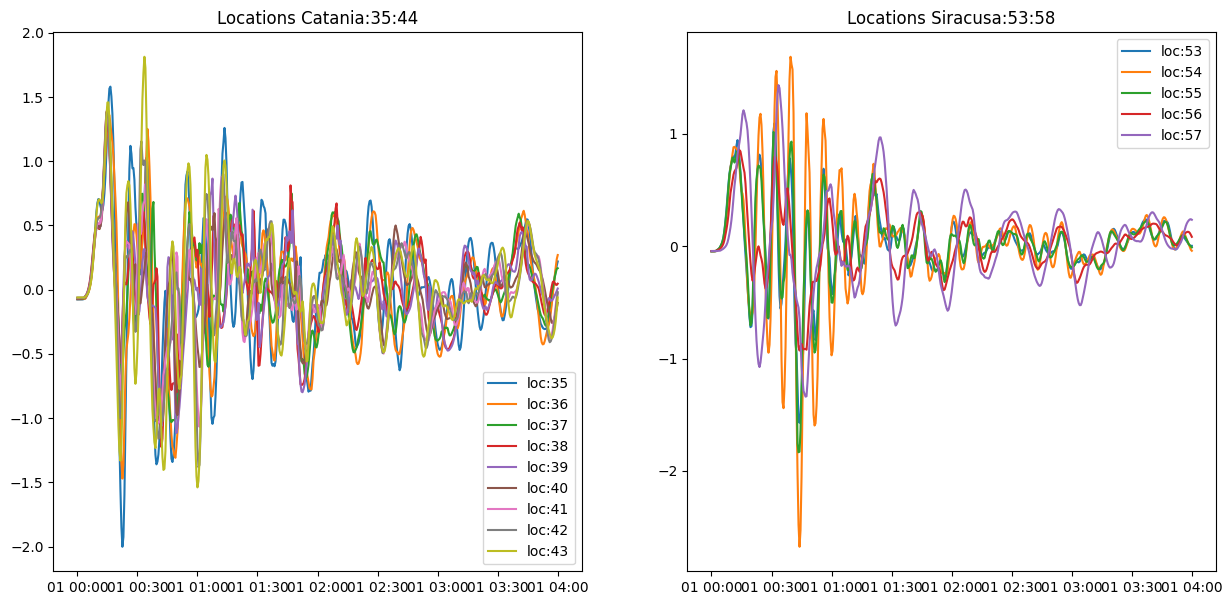

In [5]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

for i in range(35,44):
    ax[0].plot(ds.time,ds.eta[:,i],label = f'loc:{i}')
ax[0].set_title(f'Locations Catania:35:44')
ax[0].set_label
ax[0].legend()


for i in range(53,58):
    ax[1].plot(ds.time,ds.eta[:,i],label = f'loc:{i}')
ax[1].set_title(f'Locations Siracusa:53:58')
ax[1].legend()

plt.show()



Depth at offshore points

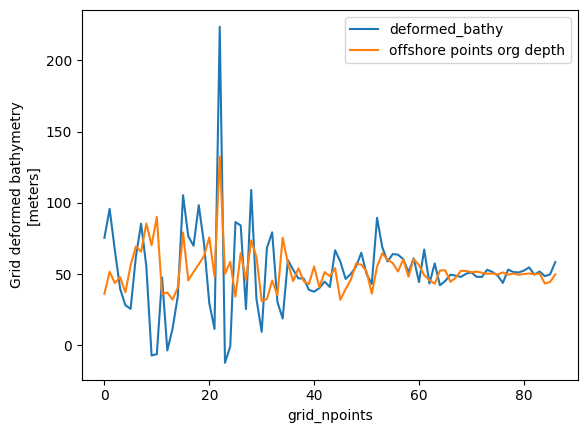

In [6]:
ds.deformed_bathy.plot(label = 'deformed_bathy')
plt.plot(z_pts*-1,label = 'offshore points org depth')
plt.legend()
plt.show()

Had to rename some file names which had some the event id joined to it

In [7]:
# file_list = glob.glob('./../data/simu/PS_manning003/**/*SR_defbathy.nc')
# print(len(file_list))
# with open ('SR_rename.txt', 'w') as file:
#     for idx, item in enumerate (file_list):
#         file.write(',')
#         file.write(item)


# for file in file_list:
#     # print(file)
#     # print(os.path.join(file.rsplit('/',1)[-2],'SR_defbathy.nc'))
#     os.rename(file,os.path.join(file.rsplit('/',1)[-2],'SR_defbathy.nc')) 
    

Grid Data

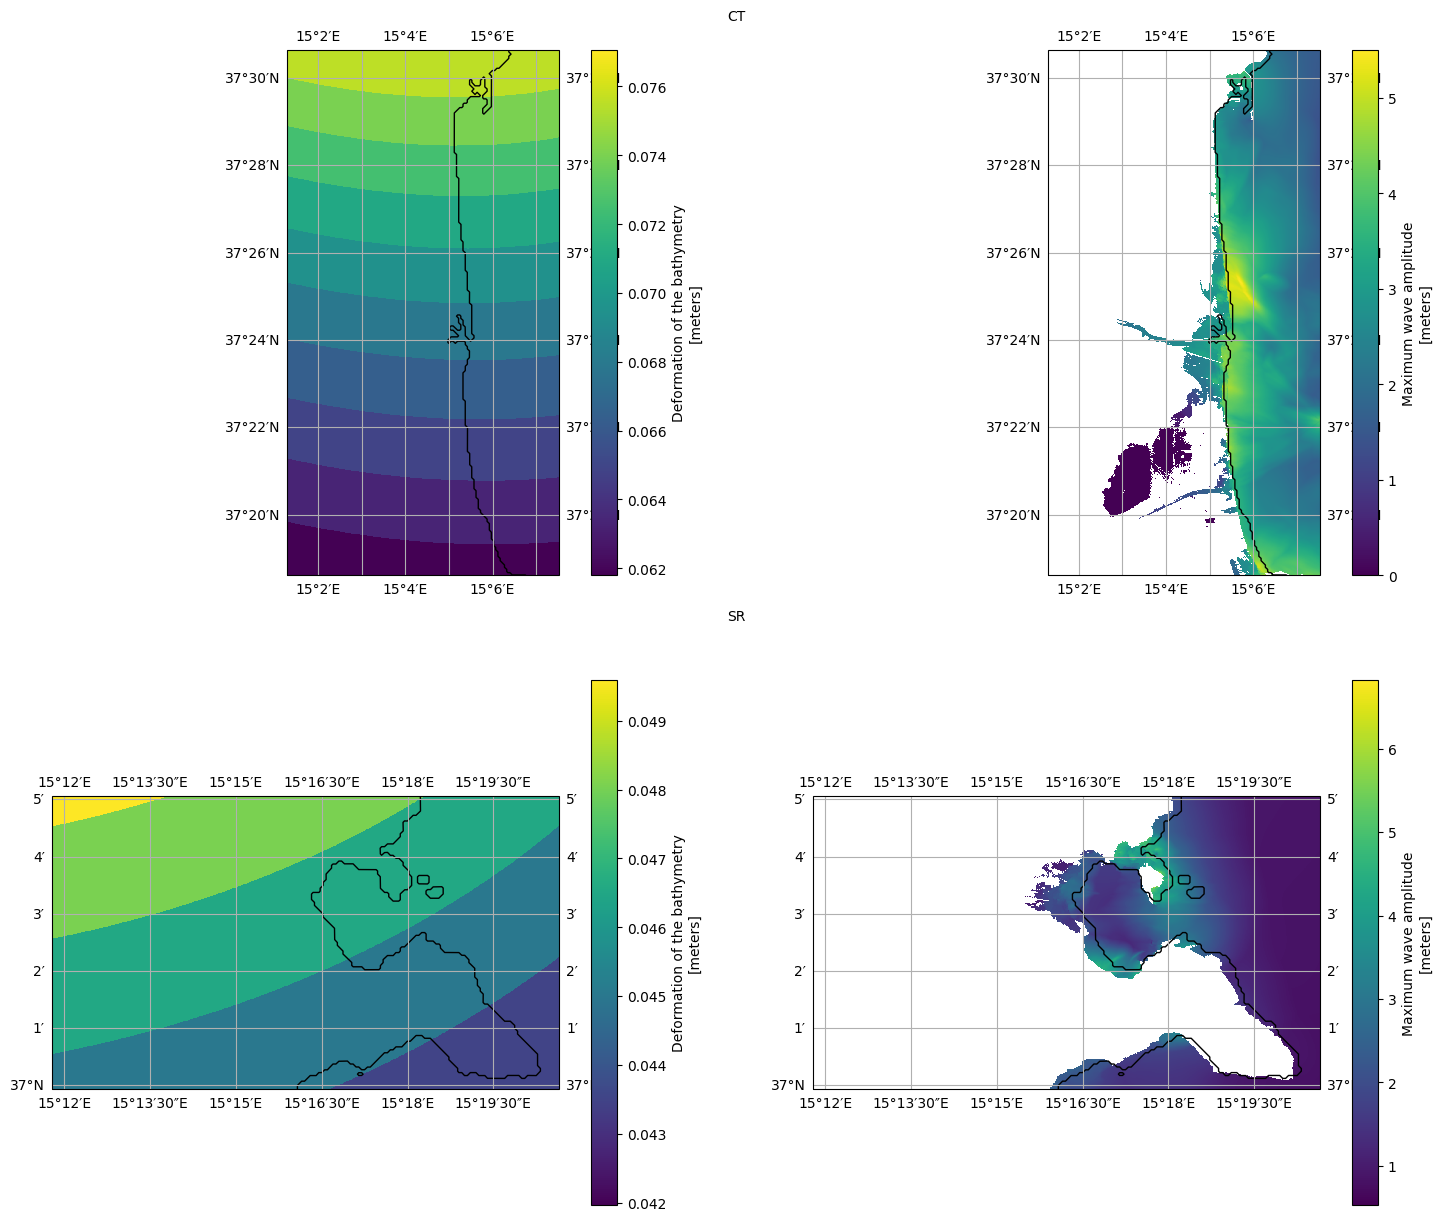

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ds_grids_CT = xr.open_dataset(file_list[4]) #gridts file
ds_grids_SR = xr.open_dataset(file_list[5]) #gridts file

# print(ds_grids_CT)
# print(ds_grids_SR)

#plot maps of max height and deformations
fig,ax = plt.subplots(2,2,figsize=(18,15), subplot_kw={'projection': ccrs.PlateCarree()})
plt.figtext(0.5,0.9,'CT')
plt.figtext(0.5,0.5,'SR')

ds_grids_CT.max_height.plot(ax=ax[0,1],)
ds_grids_CT.deformation.plot(ax=ax[0,0])
ds_grids_SR.max_height.plot(ax=ax[1,1])
ds_grids_SR.deformation.plot(ax=ax[1,0])
coast = cfeature.GSHHSFeature(scale='full')

for i in range(2):
    for j in range(2):
        ax[i,j].add_feature(coast, edgecolor='black')
        ax[i,j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()

Try to mask use deformed bathy and plot only onshore values

<xarray.DataArray 'deformation' ()>
array(0.04959182, dtype=float32)


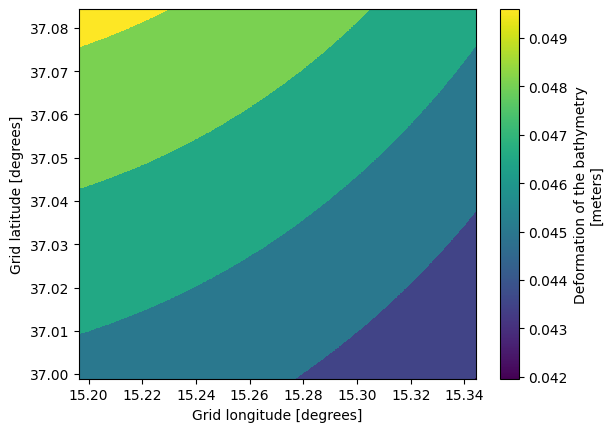

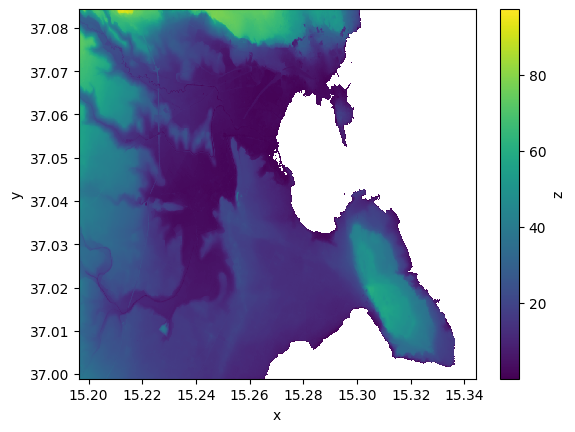

z,dZ,D,H 1.2255200147628784 0.046540018171072006 0.17068207263946533 1.3962020874023438
check if h = z+D here 1.3962020874023438
if we remove dZ from all variable for ML training 0.046540018171072006


In [9]:
ds_Z = xr.open_dataset(file_list[6]) #gridts file
ds_dZ = xr.open_dataset(file_list[7]) #gridts file
ds_D = xr.open_dataset(file_list[8]) #gridts file
ds_H = xr.open_dataset(file_list[9]) #gridts file

# print(ds_Z.z.max())
# ds_Z.z.plot()
# plt.show()
print(ds_dZ.deformation.max())
ds_dZ.deformation.plot()
plt.show()
# ds_D.z.plot()
# print(ds_D.z.max())
# plt.show()
# ds_H.max_height.plot.contourf()
# print(ds_H.max_height.max())
# plt.show()

var = ds_Z.z
var = var.where(var > 0)
var.plot()
plt.show()

i = 700
j = 600

z = ds_Z.z[i,j].values.astype(float)
dZ = ds_dZ.deformation[i,j].values.astype(float)
D = ds_D.z[i,j].values.astype(float)
H = ds_H.max_height[i,j].values.astype(float)

print('z,dZ,D,H',z,dZ,D,H)

print('check if h = z+D here',z+D)

print('if we remove dZ from all variable for ML training',dZ)

Calculate Statistics from offshore gauges and onshore grids

In [10]:
import numpy as np
import pandas as pd
import xarray as xr

sim_dir = './../data/simu/PS_manning003/'
eve = np.loadtxt('./../data/events/sample_events1212_withNGI.txt',dtype = 'str') 
GaugeNo_CT = list(range(35,44)) #for Catania
GaugeNo_SR = list(range(53,58)) #for Siracusa

#gauge variables: time,eta,depth,velocity
features_name = ['id','count','max','logsum','mean','sd']
all_eve_df_CT = pd.DataFrame(columns = features_name)
all_eve_df_SR = pd.DataFrame(columns = features_name)

resourcePath = './../data/info/C_{:s}_alleve_{:s}.onshore.txt'

#read station data for each event and calculate statistics for each gauge
for e in eve:
    # filepath_os = os.path.join(path,e,'grid0_ts.nc.offshore.txt') 
    # df = pd.read_csv(filepath_os,sep='\t')
    
    # filepath_CT = os.path.join(path,e,'grid0_ts.nc')
    # filepath_SR = os.path.join(path,e,'grid1_ts.nc')
    
    Hpath_format = sim_dir + e + '/C_{:s}.nc'
    Zpath_format = sim_dir + e + '/{:s}_defbathy.nc'
    Opath_format = sim_dir + e + '/C_{:s}.nc.onshore.txt'

    regions = ['CT','SR']
    eve_df = pd.DataFrame(columns = features_name)
    for reg in regions:
        H_grids = xr.open_dataset(Hpath_format.format(reg)) #grid file of depth
        Z_grids = xr.open_dataset(Zpath_format.format(reg)) #grid file of bathymetry

        H = H_grids.max_height
        Z = Z_grids.z.values
        H = H.where(Z > 0)
        
        df=[e,H.count().values.astype(int),
         H.max().values.astype(float).round(2),
         np.log(H.sum().values.astype(float)+1).round(2),
         H.mean().values.astype(float).round(2),
         H.std().values.astype(float).round(2)]
        
        df = pd.DataFrame(df).T
        df.columns = features_name

        eve_df = pd.concat([eve_df,df])
        eve_df.to_csv(Opath_format.format(reg),index=False,sep='\t')
        eve_df = pd.DataFrame(columns = features_name)

        if reg == 'CT':
            all_eve_df_CT = pd.concat([all_eve_df_CT,df])
        elif reg =='SR':
            all_eve_df_SR = pd.concat([all_eve_df_SR,df])
        else:
            print('error')

all_eve_df_CT.to_csv(resourcePath.format('CT',str(len(eve))),index=False,sep='\t')
all_eve_df_SR.to_csv(resourcePath.format('SR',str(len(eve))),index=False,sep='\t')
        


(array([160., 127.,  65.,  37.,  61.,  97.,  99., 100., 111.,  89.,  47.,
         41.,  52.,  76.,  16.,  15.,   8.,   6.,   3.,   2.]),
 array([ 0.35  ,  1.1395,  1.929 ,  2.7185,  3.508 ,  4.2975,  5.087 ,
         5.8765,  6.666 ,  7.4555,  8.245 ,  9.0345,  9.824 , 10.6135,
        11.403 , 12.1925, 12.982 , 13.7715, 14.561 , 15.3505, 16.14  ]),
 <BarContainer object of 20 artists>)

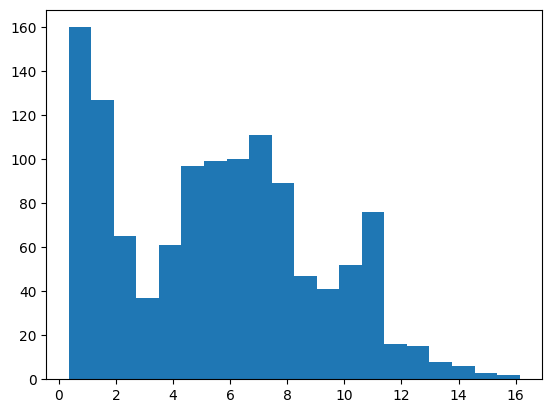

In [28]:
import matplotlib.pyplot as plt
data = all_eve_df_CT.loc[:,'max']
#plt.hist(data, weights=np.ones_like(data) / len(data))
plt.hist(data,bins=20)